In [1]:
%matplotlib notebook 
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

import Constants
from Data.Data import save_dataset, get_dataset
from Data.Evaluate import calculate_metrics
from GNN.InitialDataLayer import InitialDataLayer
from GNN.ConcatNets import ConcatNets
from GNN.NetLinear import NetLinear
from GNN.NetFirstGraphConvThenLinear import NetFirstGraphConvThenLinear
from GNN.NetFirstLinearThenGraphConv import NetFirstLinearThenGraphConv
from GNN.MyModels import MyModels
from Data.PlotMPL import plot_from_file, plot_predicted, use_new_window
from Data.Preprocess import is_labeled_positive

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Using backend: pytorch


In [2]:
limit = 500
dataset, dataset_filenames, word_to_ixs, standardize = get_dataset(limit=limit)

train_d, test_d, train_f, test_f = train_test_split(dataset, dataset_filenames, test_size=0.17)
del dataset, dataset_filenames

models = MyModels(word_to_ixs)

Dataset loaded in 1.9s


In [3]:
import torch
targets = train_d[0].ndata['label']
targets

tensor([0, 0, 0,  ..., 0, 0, 0])

In [6]:
torch.empty(3, dtype=torch.long).random_(5)

tensor([3, 2, 0])

In [36]:
model_name = 'just_linear'
model = models.my_models[model_name]

In [37]:
model, loss = models.load_models(model_name)


<IPython.core.display.Javascript object>


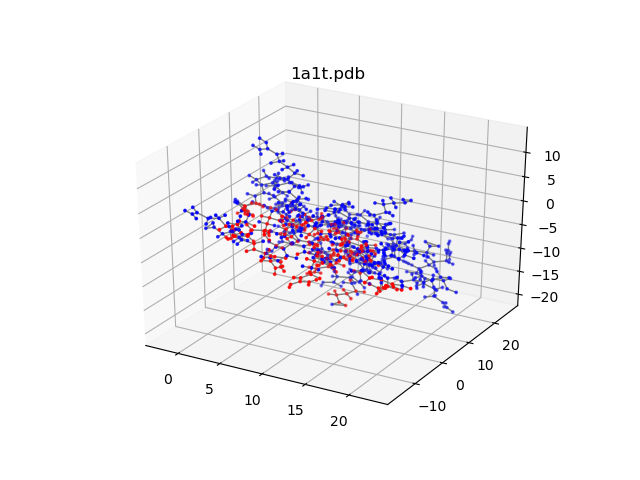

<IPython.core.display.Javascript object>


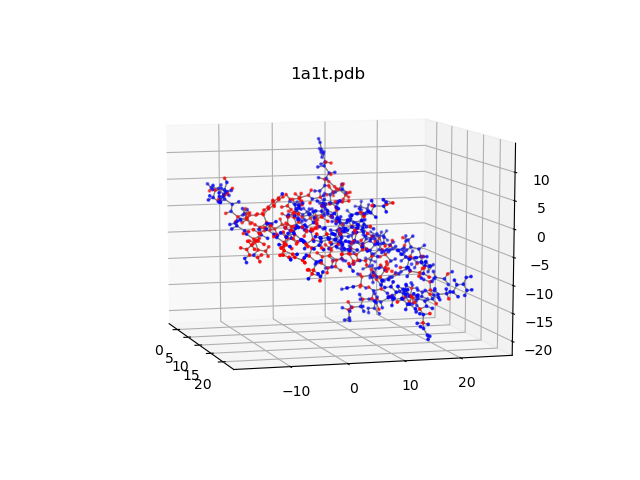

In [40]:
pdb = '1a1t.pdb'

plot_from_file(pdb, lambda atom: Constants.LABEL_POSITIVE_COLOR if is_labeled_positive(atom) else Constants.LABEL_NEGATIVE_COLOR,
               word_to_ixs, standardize=standardize)
plot_predicted(pdb, model, word_to_ixs, standardize=standardize)

In [41]:

# calculate_metrics(test_d, net, print_model_name=model_name)